In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/Coord-Personal/Documents/ITZELT/TEC/UNII/SEXTO_SEMESTRE/analisis_numerico/Reto/datos/COLL_TEC_CONSOLIDADO.txt", sep=",", encoding="latin1")

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\1973073659.py:1: DtypeWarning: Columns (45,46,47,51,52,53,57,58,59,87,88,89,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Coord-Personal/Documents/ITZELT/TEC/UNII/SEXTO_SEMESTRE/analisis_numerico/Reto/datos/COLL_TEC_CONSOLIDADO.txt", sep=",", encoding="latin1")


In [4]:
df.head()

,ORG,Socio,Producto,Fecha_aprobacion,Fecha_activacion,Mob,Saldo_total,Saldo_Mes,Pago_minimo,Utilizacion,...,Fecha_pago_M5,Fecha_pago_M6,Canal_Pago_M1,Canal_Pago_M2,Canal_Pago_M3,Canal_Pago_M4,Canal_Pago_M5,Canal_Pago_M6,Score_pago,Variable_objetivo
0,310,CYA,PLCC,31/10/2007,13/12/2007,199,1533.90,734.40,115.0,0.174307,...,NaN,13/12/2023,NaN,NaN,Santander,Santander,NaN,Santander,7.0,1
1,310,CYA,PLCC,18/06/2008,19/06/2008,191,913.02,747.02,194.0,0.332007,...,NaN,05/12/2023,NaN,C&A,C&A,C&A,NaN,C&A,9.0,1
2,310,CYA,PLCC,20/06/2008,23/06/2008,191,4763.07,4763.07,883.0,1.107691,...,06/01/2024,11/12/2023,NaN,C&A,NaN,C&A,C&A,C&A,4.0,1
3,310,CYA,PLCC,30/01/2008,31/01/2008,196,2336.97,2336.97,495.0,0.265565,...,NaN,NaN,NaN,Prosa / Interbancario,Prosa / Interbancario,NaN,NaN,NaN,4.0,1
4,310,CYA,PLCC,26/06/2008,27/06/2008,191,3769.18,2744.68,435.0,0.428316,...,23/12/2023,18/11/2023,NaN,C&A,C&A,C&A,Diestel,C&A,11.0,1


In [5]:
df.shape

(1289881, 98)

In [6]:
df.columns

Index(['ORG', 'Socio', 'Producto', 'Fecha_aprobacion', 'Fecha_activacion',
       'Mob', 'Saldo_total', 'Saldo_Mes', 'Pago_minimo', 'Utilizacion',
       'Corte', 'Fecha_corte', 'Fecha_limite_pago', 'Fecha_prox_corte', 'Pago',
       'Fecha_pago', 'Canal_Pago', 'Ciclo_Atraso', 'Limite_credito',
       'Fecha_nac', 'Genero', 'ESTADO', 'CP', 'Behavior', 'Saldo_total_M1',
       'Saldo_total_M2', 'Saldo_total_M3', 'Saldo_total_M4', 'Saldo_total_M5',
       'Saldo_total_M6', 'Saldo_Mes_M1', 'Saldo_Mes_M2', 'Saldo_Mes_M3',
       'Saldo_Mes_M4', 'Saldo_Mes_M5', 'Saldo_Mes_M6', 'Pago_minimo_M1',
       'Pago_minimo_M2', 'Pago_minimo_M3', 'Pago_minimo_M4', 'Pago_minimo_M5',
       'Pago_minimo_M6', 'Fecha_corte_M1', 'Fecha_corte_M2', 'Fecha_corte_M3',
       'Fecha_corte_M4', 'Fecha_corte_M5', 'Fecha_corte_M6',
       'Fecha_limite_pago_M1', 'Fecha_limite_pago_M2', 'Fecha_limite_pago_M3',
       'Fecha_limite_pago_M4', 'Fecha_limite_pago_M5', 'Fecha_limite_pago_M6',
       'Fecha_prox_corte_M

## EDA

In [7]:
df.groupby(["ORG", "Producto"])[["Limite_credito","Saldo_total", "Saldo_Mes", "Pago_minimo", "Ciclo_Atraso", "Limite_credito","Corte", "Fecha_limite_pago", "Pago"]].apply(lambda x: x.isnull().sum())

,,Limite_credito,Saldo_total,Saldo_Mes,Pago_minimo,Ciclo_Atraso,Limite_credito,Corte,Fecha_limite_pago,Pago
ORG,Producto,,,,,,,,,
310,PLCC,0,0,0,0,0,0,0,0,6443
311,PLCC,0,0,0,0,0,0,0,0,135170
320,BK,0,0,0,0,0,0,0,0,110161
340,PP,0,0,0,0,0,0,0,0,658
341,PP,0,0,0,0,0,0,0,0,51014
350,BK,0,0,0,0,0,0,0,0,334
352,BK,0,0,0,0,0,0,0,0,238624
353,BK,0,0,0,0,0,0,0,0,5903
354,BK,0,0,0,0,0,0,0,0,118535


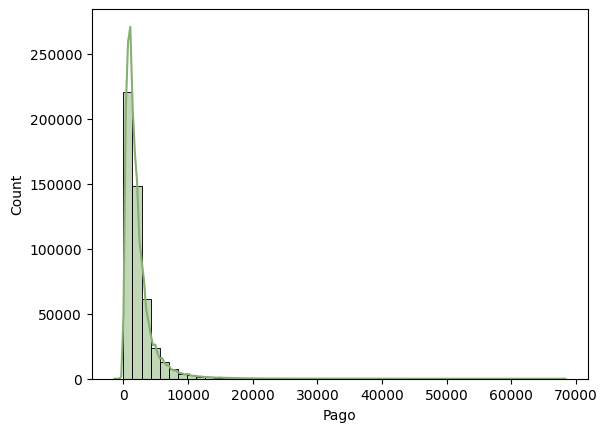

In [8]:
sns.histplot(df["Pago"], bins=50, kde=True, color= "#87AE73")
plt.show()

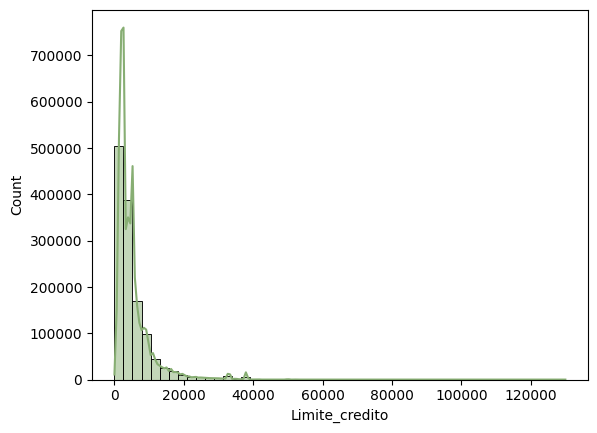

In [9]:
sns.histplot(df["Limite_credito"], bins=50, kde=True, color = "#87AE73")
plt.show()

Hay una mayor cantidad de personas con un límite de crédito de menos de 10k 

### Análisis perfil financieron

In [10]:
df[["SaldoTotal", "SaldoMes", "Pago_minimo", "Pago"]]

KeyError: "['SaldoTotal', 'SaldoMes'] not in index"

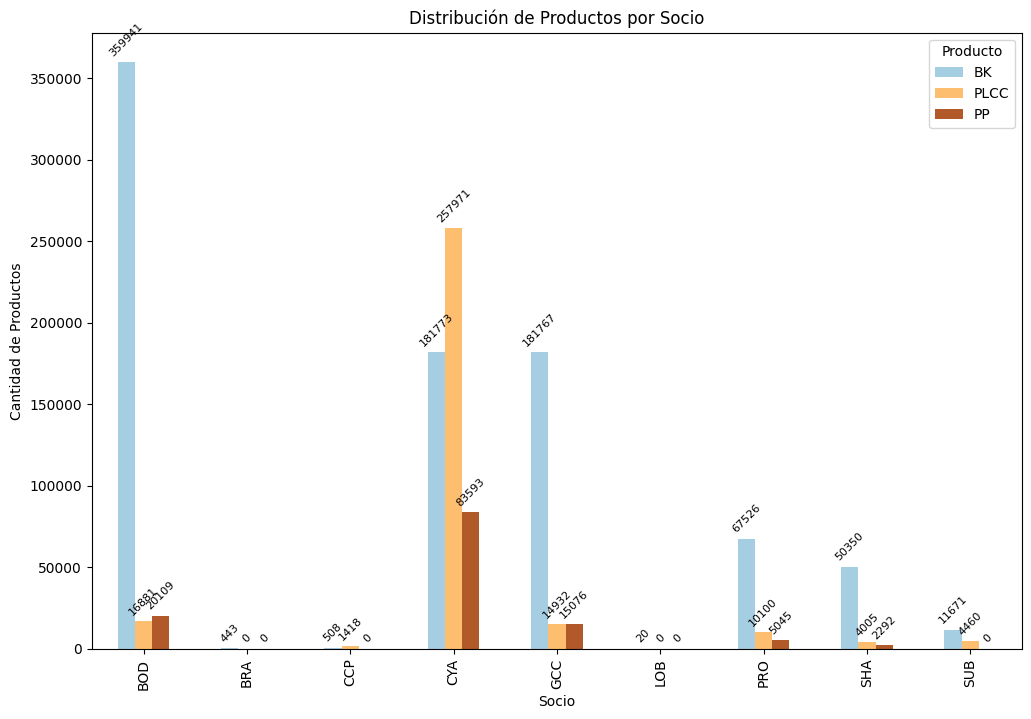

In [ ]:
ax = df.groupby("Socio")["Producto"].value_counts().unstack().plot(kind = "bar", stacked = False, cmap = "Paired", figsize = (12, 8))

for container in ax.containers:
    ax.bar_label(container, fontsize = 8, fmt = "%.0f", padding = 3, rotation = 45)
    
plt.xlabel("Socio")
plt.ylabel("Cantidad de Productos")
plt.title("Distribución de Productos por Socio")
plt.legend(title="Producto")
plt.show()

Podemos ver que hay mayor cantidad de personas que usan el producto de tarjeta visa, excpeto en cya (tienda de ropa) donde ahí se utiliza más el tipo de tarjeta de consumo departmental (makes sense) pero en general, de donde se tiene mayor información de datos es en bogeda aurrerá y en CYA

## Procesos de markov 

In [ ]:
df_pte = df[["ORG", 'Saldo_total', 'Saldo_total_M1',
       'Saldo_total_M2', 'Saldo_total_M3', 'Saldo_total_M4', 'Saldo_total_M5',
       'Saldo_total_M6', "Saldo_Mes" ,'Saldo_Mes_M1', 'Saldo_Mes_M2', 'Saldo_Mes_M3',
       'Saldo_Mes_M4', 'Saldo_Mes_M5', 'Saldo_Mes_M6', "Pago_minimo" ,'Pago_minimo_M1',
       'Pago_minimo_M2', 'Pago_minimo_M3', 'Pago_minimo_M4', 'Pago_minimo_M5',
       'Pago_minimo_M6', "Pago" ,'Pago_M1','Pago_M2', 'Pago_M3', 'Pago_M4', 'Pago_M5', 'Pago_M6', "Fecha_activacion", "Fecha_corte"]]

A las variables que no tienen M, le añadimos el 0 para mayor claridad de que es la actual y poder diferenciar de las de meses pasados!

In [ ]:
df_pte.rename(columns = {"Saldo_total": "Saldo_total_M0", "Saldo_Mes": "Saldo_Mes_M0", "Pago_minimo": "Pago_minimo_M0", "Pago": "Pago_M0"}, inplace = True)

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\439072327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potaxie.rename(columns = {"Saldo_total": "Saldo_total_M0", "Saldo_Mes": "Saldo_Mes_M0", "Pago_minimo": "Pago_minimo_M0", "Pago": "Pago_M0"}, inplace = True)


In [ ]:
df_pte

,ORG,Saldo_total_M0,Saldo_total_M1,Saldo_total_M2,Saldo_total_M3,Saldo_total_M4,Saldo_total_M5,Saldo_total_M6,Saldo_Mes_M0,Saldo_Mes_M1,...,Pago_minimo_M6,Pago_M0,Pago_M1,Pago_M2,Pago_M3,Pago_M4,Pago_M5,Pago_M6,Fecha_activacion,Fecha_corte
0,310,1533.90,1211.78,1199.25,1332.50,1610.93,1598.78,210.78,734.40,279.03,...,22.0,300.00,NaN,NaN,133.25,278.43,NaN,211.0,13/12/2007,20/05/2024
1,310,913.02,324.09,601.24,901.24,1780.24,1389.60,2429.60,747.02,324.09,...,104.0,500.00,NaN,301.0,300.00,1781.00,NaN,1040.0,19/06/2008,20/05/2024
2,310,4763.07,4065.19,4558.01,3895.49,3965.56,4112.82,4262.29,4763.07,4065.19,...,427.0,900.00,NaN,850.0,NaN,400.00,500.0,500.0,23/06/2008,20/05/2024
3,310,2336.97,1843.22,1468.65,2109.17,NaN,NaN,NaN,2336.97,1843.22,...,NaN,2350.00,NaN,1000.0,1000.00,NaN,NaN,NaN,31/01/2008,15/05/2024
4,310,3769.18,3302.61,4308.61,3222.61,1663.60,1996.60,3027.60,2744.68,1603.78,...,310.0,4349.00,NaN,1305.0,963.00,333.00,333.0,3028.0,27/06/2008,03/05/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289876,378,684.64,661.59,NaN,NaN,NaN,NaN,NaN,464.11,220.53,...,NaN,686.00,NaN,NaN,NaN,NaN,NaN,NaN,24/10/2024,25/11/2024
1289877,378,1154.75,1115.87,NaN,NaN,NaN,NaN,NaN,782.80,371.97,...,NaN,1154.75,NaN,NaN,NaN,NaN,NaN,NaN,24/10/2024,25/11/2024
1289878,378,965.72,933.20,NaN,NaN,NaN,NaN,NaN,654.66,311.08,...,NaN,400.00,NaN,NaN,NaN,NaN,NaN,NaN,24/10/2024,25/11/2024
1289879,378,2362.64,2250.45,NaN,NaN,NaN,NaN,NaN,1761.83,1048.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24/10/2024,25/11/2024


De aquí podemos ver, hay ciertos clientes que tienen valores NaN para ciertas variables como es el caso de Saldo Total esto se repite para las de pago mínimo, ¿esto significaría que son personas nuevas?, es decir no estaban desde los seis meses que se reportaron los datos. ¿cómo podemos analizar y confirmar esto? con las variables de fechas: fecha activación y fecha corte.


esto nos servirá porque si analizamos a todos los clientes por igual, aquellos que son nuevos pueden tener cierto sesgo porque diríamos que siempre han estado pagando, cuando en realidad, tiene poco tiempo de activación 

In [ ]:
# convertimos las fechas a datetime para evitar errores!!
df_pte["Fecha_corte"] = pd.to_datetime(df_pte["Fecha_corte"])
df_pte["Fecha_activacion"] = pd.to_datetime(df_pte["Fecha_activacion"])

# ahora creamos nuestra fecha de referencia 
fecha_referencia = df_pte["Fecha_corte"].max()


C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\1150043191.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  potaxie["Fecha_corte"] = pd.to_datetime(potaxie["Fecha_corte"])
C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\1150043191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potaxie["Fecha_corte"] = pd.to_datetime(potaxie["Fecha_corte"])
C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\1150043191.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  potaxie["Fecha_activacion"] 

In [ ]:
# clientes con activación en los útimos 6 meses, así podemos ver si son nuevos o no 
df_pte["cliente_nuevo"] = (df_pte["Fecha_activacion"] >= fecha_referencia - pd.DateOffset(months = 6))


C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\2343407535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potaxie["cliente_nuevo"] = (potaxie["Fecha_activacion"] >= fecha_referencia - pd.DateOffset(months = 6))


In [ ]:
df_pte["cliente_fiel"] = ~df_pte["cliente_nuevo"]

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\1476059516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potaxie["cliente_fiel"] = ~potaxie["cliente_nuevo"]


In [ ]:
df_pte["tipo_cliente"] = np.where(df_pte["cliente_nuevo"], "cliente_nuevo", "cliente_fiel")

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\3670230211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potaxie["tipo_cliente"] = np.where(potaxie["cliente_nuevo"], "cliente_nuevo", "cliente_fiel")


In [ ]:
df_pte.drop(columns = ["cliente_nuevo", "cliente_fiel"], inplace = True)

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\238780747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potaxie.drop(columns = ["cliente_nuevo", "cliente_fiel"], inplace = True)


In [ ]:
df_pte 

,ORG,Saldo_total_M0,Saldo_total_M1,Saldo_total_M2,Saldo_total_M3,Saldo_total_M4,Saldo_total_M5,Saldo_total_M6,Saldo_Mes_M0,Saldo_Mes_M1,...,Pago_M0,Pago_M1,Pago_M2,Pago_M3,Pago_M4,Pago_M5,Pago_M6,Fecha_activacion,Fecha_corte,tipo_cliente
0,310,1533.90,1211.78,1199.25,1332.50,1610.93,1598.78,210.78,734.40,279.03,...,300.00,NaN,NaN,133.25,278.43,NaN,211.0,2007-12-13,2024-05-20,cliente_fiel
1,310,913.02,324.09,601.24,901.24,1780.24,1389.60,2429.60,747.02,324.09,...,500.00,NaN,301.0,300.00,1781.00,NaN,1040.0,2008-06-19,2024-05-20,cliente_fiel
2,310,4763.07,4065.19,4558.01,3895.49,3965.56,4112.82,4262.29,4763.07,4065.19,...,900.00,NaN,850.0,NaN,400.00,500.0,500.0,2008-06-23,2024-05-20,cliente_fiel
3,310,2336.97,1843.22,1468.65,2109.17,NaN,NaN,NaN,2336.97,1843.22,...,2350.00,NaN,1000.0,1000.00,NaN,NaN,NaN,2008-01-31,2024-05-15,cliente_fiel
4,310,3769.18,3302.61,4308.61,3222.61,1663.60,1996.60,3027.60,2744.68,1603.78,...,4349.00,NaN,1305.0,963.00,333.00,333.0,3028.0,2008-06-27,2024-05-03,cliente_fiel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289876,378,684.64,661.59,NaN,NaN,NaN,NaN,NaN,464.11,220.53,...,686.00,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-24,2024-11-25,cliente_nuevo
1289877,378,1154.75,1115.87,NaN,NaN,NaN,NaN,NaN,782.80,371.97,...,1154.75,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-24,2024-11-25,cliente_nuevo
1289878,378,965.72,933.20,NaN,NaN,NaN,NaN,NaN,654.66,311.08,...,400.00,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-24,2024-11-25,cliente_nuevo
1289879,378,2362.64,2250.45,NaN,NaN,NaN,NaN,NaN,1761.83,1048.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-24,2024-11-25,cliente_nuevo


Ahora que ya tenemos ubicamos a los clientes, para el análisis hay que enfocarnos en aquellos que son clientes fieles, es decir tienen sus historial completo

In [ ]:
df_pte.fillna(0, inplace = True)

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_20208\669888916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potaxie.fillna(0, inplace = True)


Ahora que ya tenemos a los clientes que tienen todo el historial y no nos darían sesgo de que son buenos clientes sin considerar que tienen menos meses de activación, hacemos nuestro análisis del interés 

In [ ]:
df_clientes_fieles = df_pte[df_pte["tipo_cliente"] == "cliente_fiel"]
df_clientes_fieles

,ORG,Saldo_total_M0,Saldo_total_M1,Saldo_total_M2,Saldo_total_M3,Saldo_total_M4,Saldo_total_M5,Saldo_total_M6,Saldo_Mes_M0,Saldo_Mes_M1,...,Pago_M0,Pago_M1,Pago_M2,Pago_M3,Pago_M4,Pago_M5,Pago_M6,Fecha_activacion,Fecha_corte,tipo_cliente
0,310,1533.90,1211.78,1199.25,1332.50,1610.93,1598.78,210.78,734.40,279.03,...,300.0,0.0,0.0,133.25,278.43,0.0,211.0,2007-12-13,2024-05-20,cliente_fiel
1,310,913.02,324.09,601.24,901.24,1780.24,1389.60,2429.60,747.02,324.09,...,500.0,0.0,301.0,300.00,1781.00,0.0,1040.0,2008-06-19,2024-05-20,cliente_fiel
2,310,4763.07,4065.19,4558.01,3895.49,3965.56,4112.82,4262.29,4763.07,4065.19,...,900.0,0.0,850.0,0.00,400.00,500.0,500.0,2008-06-23,2024-05-20,cliente_fiel
3,310,2336.97,1843.22,1468.65,2109.17,0.00,0.00,0.00,2336.97,1843.22,...,2350.0,0.0,1000.0,1000.00,0.00,0.0,0.0,2008-01-31,2024-05-15,cliente_fiel
4,310,3769.18,3302.61,4308.61,3222.61,1663.60,1996.60,3027.60,2744.68,1603.78,...,4349.0,0.0,1305.0,963.00,333.00,333.0,3028.0,2008-06-27,2024-05-03,cliente_fiel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288312,377,2062.61,1571.18,1145.36,3053.67,2619.00,3762.30,0.00,2062.61,1571.18,...,2260.0,0.0,0.0,2000.00,0.00,1663.0,0.0,2024-05-26,2024-11-25,cliente_fiel
1288313,377,3642.06,2926.78,2188.70,1893.23,896.76,950.22,0.00,3520.66,2651.03,...,0.0,0.0,0.0,315.00,230.00,242.0,0.0,2024-05-26,2024-11-25,cliente_fiel
1288314,377,3992.85,3293.27,2704.95,2571.06,2769.40,2400.00,0.00,3992.85,3293.27,...,0.0,0.0,0.0,350.00,316.00,0.0,0.0,2024-05-26,2024-11-20,cliente_fiel
1288316,377,500.63,173.74,148.30,0.00,476.30,1201.30,0.00,500.63,173.74,...,0.0,0.0,0.0,0.00,477.00,1202.0,0.0,2024-05-27,2024-11-15,cliente_fiel


In [25]:
df_clientes_fieles.columns 

Index(['ORG', 'Saldo_total_M0', 'Saldo_total_M1', 'Saldo_total_M2',
       'Saldo_total_M3', 'Saldo_total_M4', 'Saldo_total_M5', 'Saldo_total_M6',
       'Saldo_Mes_M0', 'Saldo_Mes_M1', 'Saldo_Mes_M2', 'Saldo_Mes_M3',
       'Saldo_Mes_M4', 'Saldo_Mes_M5', 'Saldo_Mes_M6', 'Pago_minimo_M0',
       'Pago_minimo_M1', 'Pago_minimo_M2', 'Pago_minimo_M3', 'Pago_minimo_M4',
       'Pago_minimo_M5', 'Pago_minimo_M6', 'Pago_M0', 'Pago_M1', 'Pago_M2',
       'Pago_M3', 'Pago_M4', 'Pago_M5', 'Pago_M6', 'Fecha_activacion',
       'Fecha_corte', 'tipo_cliente'],
      dtype='object')

In [24]:
df_clientes_fieles["ORG"].unique()

array([310, 340, 357, 320, 356, 350, 355, 354, 352, 353, 365, 362, 360,
       311, 341, 367, 373, 374, 372, 375, 377], dtype=int64)